In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from src import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from src import Utils
from src import Plot

In [27]:
folder = 'network/'
Dataset14 = torch.load(folder + 'dataset14_Origin_PP.pt')
Dataset15 = torch.load(folder + 'dataset15_Origin_PP.pt')
Dataset17 = torch.load(folder + 'dataset17_Origin_PP.pt')

adj_matrices14 = torch.load(folder + 'adj_matrices14.pt')
adj_matrices15 = torch.load(folder + 'adj_matrices15.pt')
adj_matrices17 = torch.load(folder + 'adj_matrices17.pt')

## Hyperparameters

In [4]:
EPOCHS = 100 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

#STEPS_PER_EPOCH = int((len(TrainDataset)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [5]:
#model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

# Instantiate model
model_16_Origin = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

# Load trained model 
state_dict_file = 'model/16_Origin_PP_model_state_dict.pt'
device = torch.device('cuda')
model_16_Origin.load_state_dict(torch.load(state_dict_file, map_location=device))
model_16_Origin.eval()

GGNNModel(
  (linear_i): Linear(in_features=1, out_features=64, bias=True)
  (gru): GRUCell(
    (linear_z): Linear(in_features=192, out_features=64, bias=True)
    (linear_r): Linear(in_features=192, out_features=64, bias=True)
    (linear): Linear(in_features=192, out_features=64, bias=True)
  )
  (linear_o): Linear(in_features=64, out_features=1, bias=True)
)

## Hyperparamter para Dataset 15

In [6]:
TestDataset = Dataset17
adj_matrices = adj_matrices17
model = model_16_Origin
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

# Test Dataset 17

In [7]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.06 - Total_Time: 25.0 mins: 100%|██████████████████████████████| 1353/1353 [00:22<00:00, 60.95it/s]


Epoch: 100 - Loss: 0.05 - Total_Time: 38.0 mins: 100%|█████████████████████████████| 1353/1353 [00:25<00:00, 53.17it/s]


# Plots

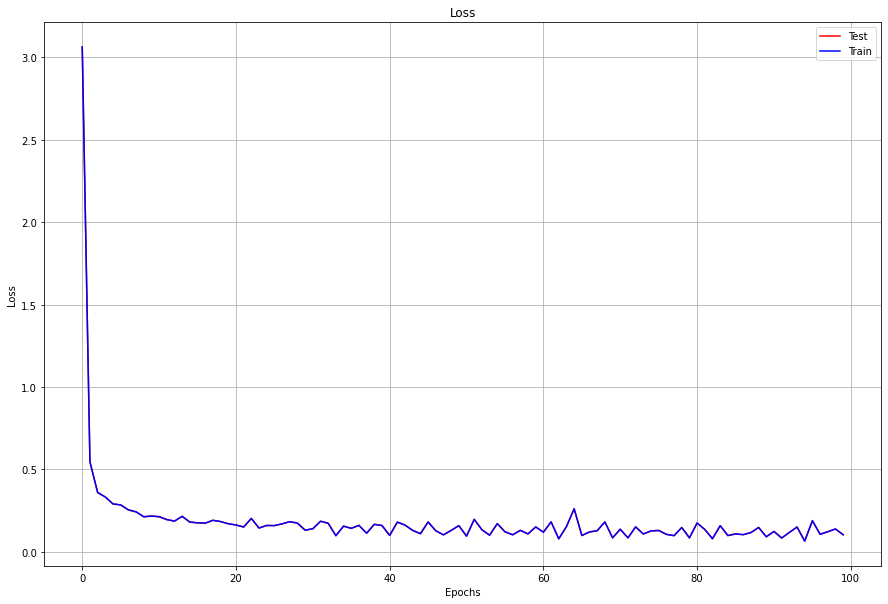

In [9]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'],statistics_tst['loss_ls'], title)

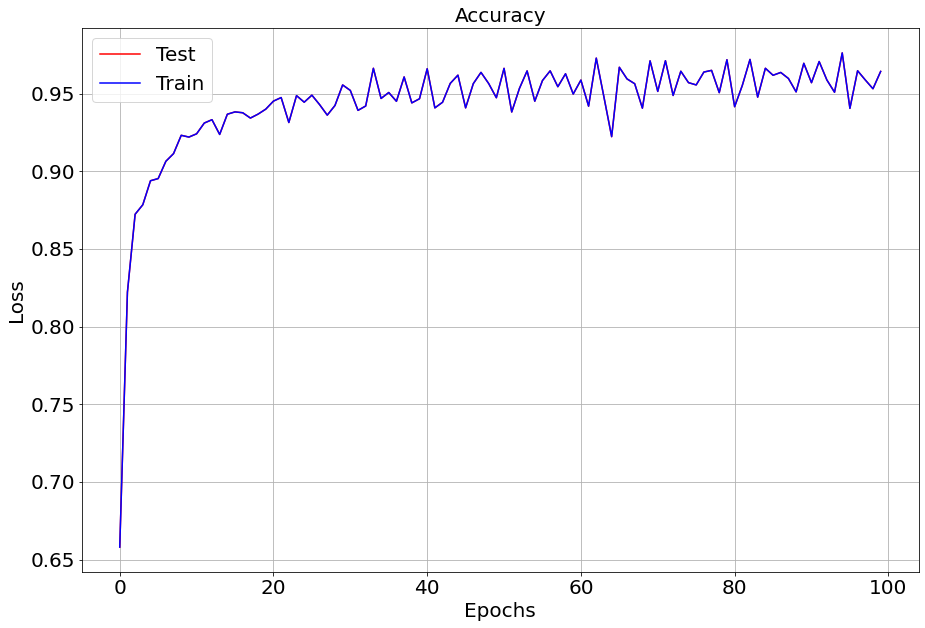

In [10]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'],statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.966560  0.045179  0.018168  0.018843  0.043929  0.330134   
1          0.006184  0.952417  0.000540  0.000366  0.000214  0.128599   
2          0.003204  0.000605  0.916022  0.063311  0.001763  0.199616   
3          0.003134  0.000141  0.052301  0.910534  0.000431  0.178503   
4          0.005673  0.000172  0.003144  0.001559  0.915199  0.040307   
8          0.002156  0.000232  0.002325  0.001522  0.001211  0.026871   
9          0.001503  0.000232  0.002950  0.001070  0.000776  0.007678   
10         0.005333  0.000138  0.003668  0.002183  0.035390  0.040307   
11         0.006253  0.000884  0.000882  0.000612  0.001086  0.047985   

Predicted        6         7         8         9         10        11  \
Actual                                                                  
0          0.229858  0

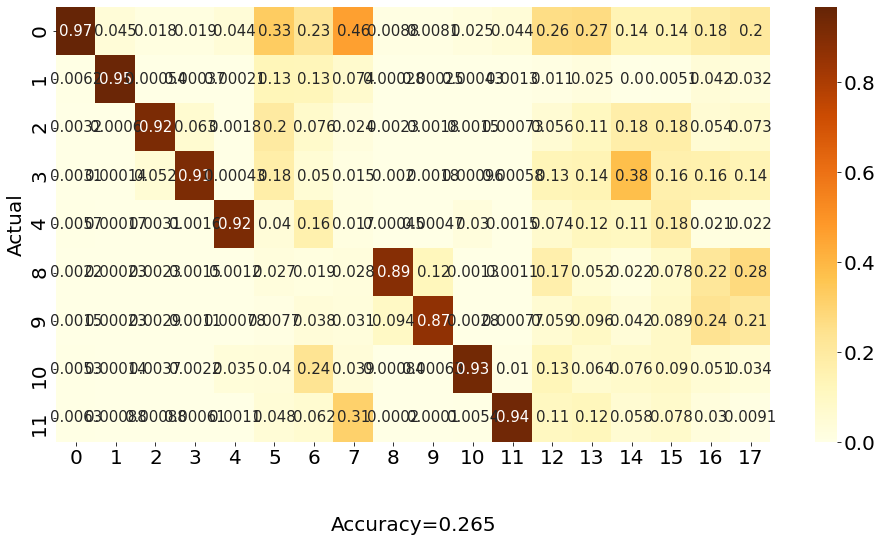

In [11]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder)

In [14]:
Acc = (0.97+0.95+0.92+0.9+0.92+0.89+0.87+0.93+0.94)/9
print('Acc: ', round(Acc,3))

Acc:  0.921


## Hyperparamter para Dataset 15

In [16]:
TestDataset = Dataset15
adj_matrices = adj_matrices15
model = model_16_Origin
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

In [17]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.04 - Total_Time: 17.3 mins: 100%|████████████████████████████████| 773/773 [00:14<00:00, 53.90it/s]


Epoch: 100 - Loss: 0.13 - Total_Time: 25.7 mins: 100%|███████████████████████████████| 773/773 [00:12<00:00, 61.06it/s]


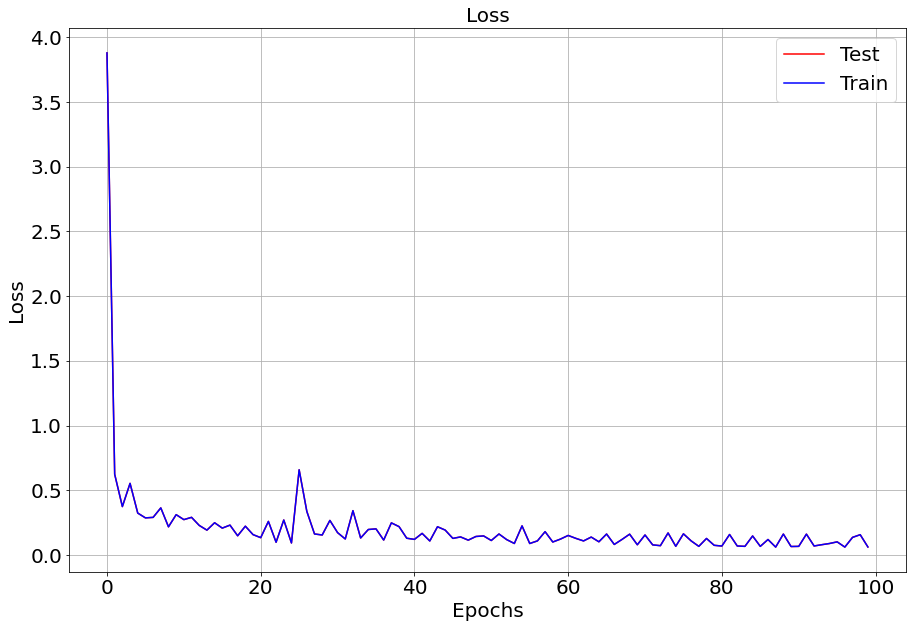

In [18]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'], statistics_tst['loss_ls'], title)

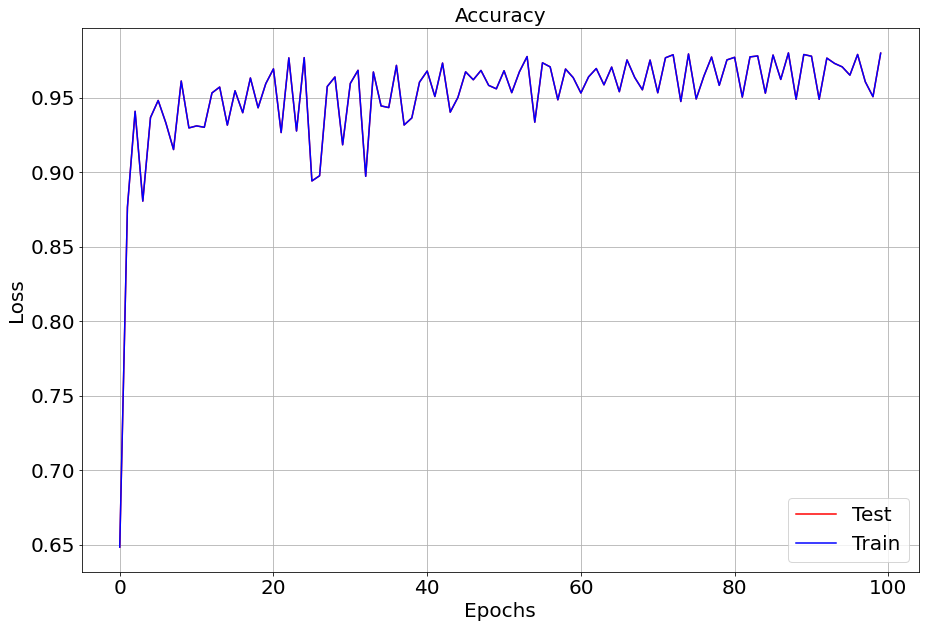

In [20]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'], statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.927450  0.005557  0.056070  0.006292  0.028698  0.000487   
1          0.002397  0.982726  0.002613  0.000455  0.452539  0.001086   
2          0.061688  0.006807  0.932940  0.005503  0.081678  0.001179   
3          0.003489  0.001075  0.003892  0.975086  0.004415  0.000210   
5          0.001520  0.002212  0.000268  0.000266  0.366446  0.996060   
9          0.001819  0.001136  0.001528  0.007572  0.050773  0.000463   
11         0.001637  0.000487  0.002688  0.004826  0.015453  0.000515   

Predicted        6         7         8         9         10        11  
Actual                                                                 
0          0.124172  0.114759  0.088737  0.001067  0.160083  0.001610  
1          0.196192  0.176420  0.068259  0.000081  0.245322  0.000287  
2          0.160596  0.141

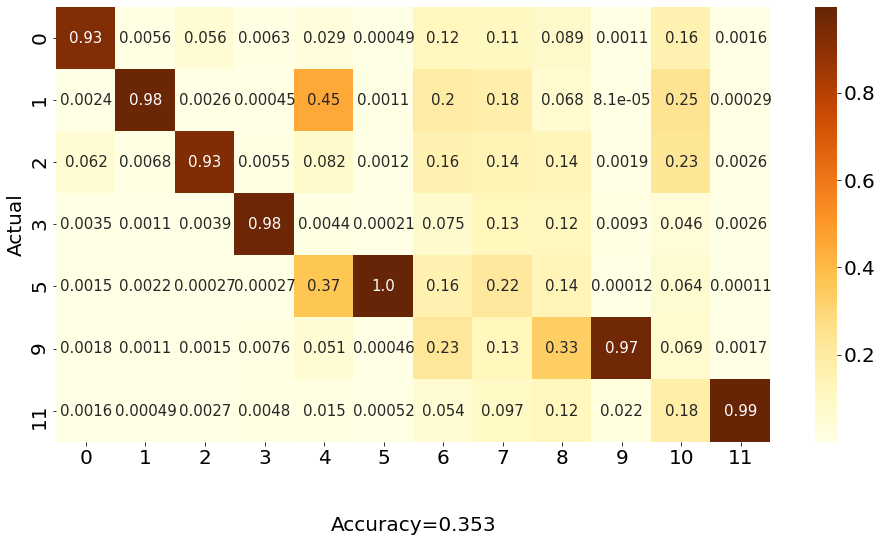

In [21]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder) 

In [26]:
Acc = (0.93+0.98+0.93+0.98+1+0.97+0.99)/7
print('Acc: ', round(Acc,3))

Acc:  0.969


## Hyperparamter para Dataset 14

In [28]:
TestDataset = Dataset14
adj_matrices = adj_matrices14
model = model_16_Origin
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

In [29]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.31 - Total_Time: 16.9 mins: 100%|████████████████████████████████| 870/870 [00:14<00:00, 58.60it/s]


Epoch: 100 - Loss: 0.38 - Total_Time: 24.8 mins: 100%|███████████████████████████████| 870/870 [00:14<00:00, 61.75it/s]


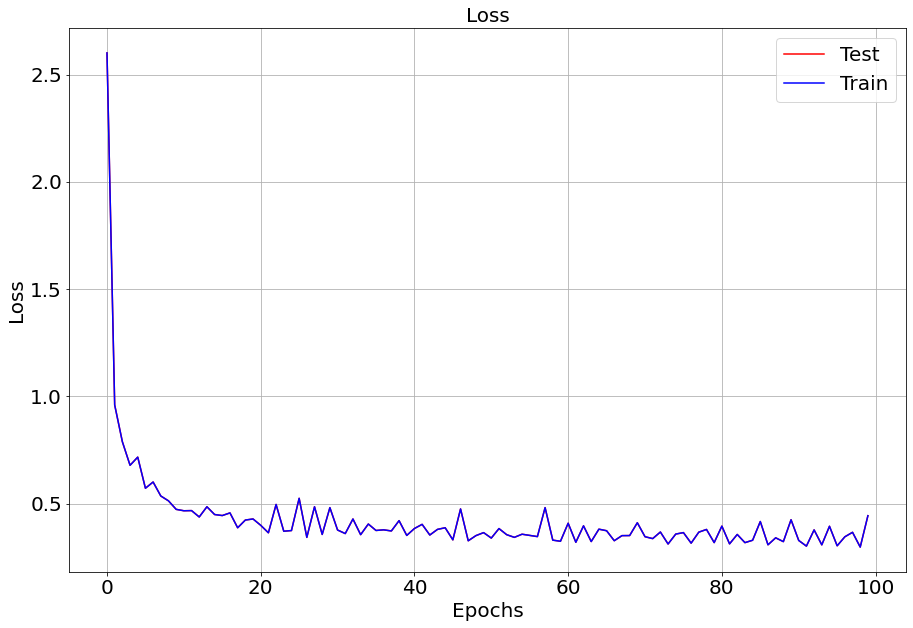

In [31]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'], statistics_tst['loss_ls'], title)

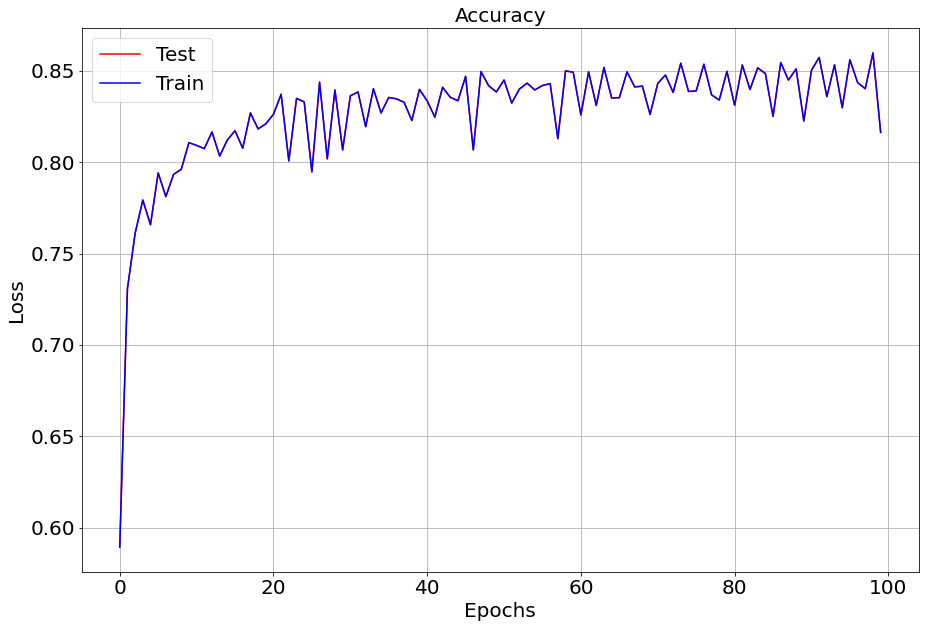

In [32]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'],statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted         0         1         2         3         4         5  \
Actual                                                                  
0          0.884668  0.067752  0.618974  0.550744  0.064438  0.052794   
1          0.021692  0.690802  0.045101  0.040595  0.026577  0.045785   
4          0.022049  0.105338  0.251944  0.090663  0.577350  0.070621   
5          0.020113  0.093045  0.043546  0.128552  0.297986  0.789330   
6          0.041044  0.040243  0.020218  0.079838  0.011618  0.016426   
7          0.010433  0.002820  0.020218  0.109608  0.022032  0.025043   

Predicted         6         7  
Actual                         
0          0.132226  0.032913  
1          0.026206  0.002299  
4          0.019098  0.002855  
5          0.014821  0.072063  
6          0.792218  0.006268  
7          0.015431  0.883603  


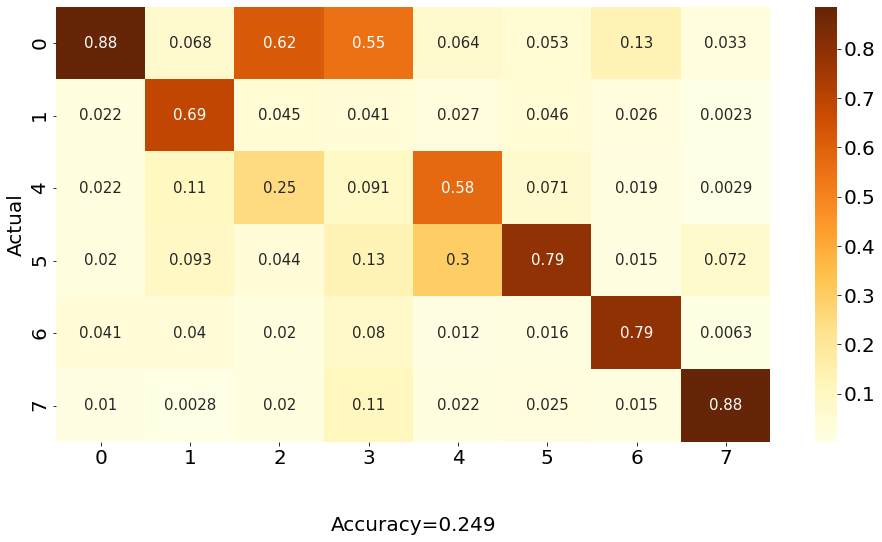

In [33]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder) 

In [35]:
Acc = (0.88+0.69+0.58+0.79+0.79+0.88)/6
print('Acc: ', round(Acc,3))

Acc:  0.768
